# Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics

path = './bank_marketing_dataset.csv'
df = pd. read_csv(path)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
subscribed        41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [3]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [4]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
subscribed        0
dtype: int64

In [5]:
kategori = ['job','marital','education','default','housing','loan','contact','month','day_of_week']

for i in kategori:
    print('Kolom: ', i)
    print(df[i].value_counts())
    print('')
    print('')

Kolom:  job
admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


Kolom:  marital
married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


Kolom:  education
university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64


Kolom:  default
no         32588
unknown     8597
yes            3
Name: default, dtype: int64


Kolom:  housing
yes        21576
no         18622
unknown      990
Name: housing, dtype: int64


Kolom:  loan
no         33950
yes         6248
unknown      990
Name: loan, dtype: int64


K

In [6]:
for column in df.columns:
    print('Kolom: ', column)
    print(df[column].unique())
    print("")

Kolom:  age
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]

Kolom:  job
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Kolom:  marital
['married' 'single' 'divorced' 'unknown']

Kolom:  education
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Kolom:  default
['no' 'unknown' 'yes']

Kolom:  housing
['no' 'yes' 'unknown']

Kolom:  loan
['no' 'yes' 'unknown']

Kolom:  contact
['telephone' 'cellular']

Kolom:  month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Kolom:  day_of_week
['mon' 'tue' 'wed' 'thu' 'fri']

Kolom:  duration
[ 261  149  226 ... 1246 1556 1868]

Kolom:  campaign
[ 1  2  3  4  5  6  7  8  9 10 1

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


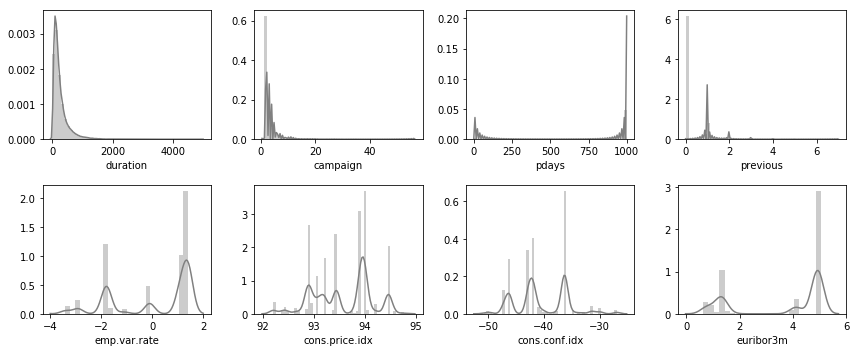

In [7]:
numbers = ['duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m']

# for i in range(0, len(numbers)):
#     plt.figure(figsize = (90,4))
#     plt.subplot(1, len(numbers), i+1)
#     sns.distplot(df[numbers[i]])
#     plt.tight_layout();
    
plt.figure(figsize=(12, 5))
for i in range(0, len(numbers)):
    plt.subplot(2, len(numbers)/2, i+1)
    sns.distplot(df[numbers[i]], color='gray')
    plt.tight_layout();

## Menghapus Outlier

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df = df[(df['previous'] <= 2) & (df['pdays'] >= 900)]

In [10]:
df.shape

(39608, 21)

In [11]:
df = df[df['campaign'] < 15]
df.shape

(39202, 21)

In [12]:
# Kolom Duration
Q1 = df['duration'].quantile(0.25)
Q3 = df['duration'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + (1.5*IQR)
batas_bawah = Q1 - (1.5*IQR)

df.drop(df.loc[(df['duration'] <= batas_bawah) | (df['duration'] >= batas_atas)].index, inplace = True)
df.shape

(36344, 21)

In [13]:
# Kolom cons.conf.idx
Q1 = df['cons.conf.idx'].quantile(0.25)
Q3 = df['cons.conf.idx'].quantile(0.75)
IQR = Q3 - Q1
batas_atas = Q3 + (1.5*IQR)
batas_bawah = Q1 - (1.5*IQR)

df.drop(df.loc[(df['cons.conf.idx'] <= batas_bawah) | (df['cons.conf.idx'] >= batas_atas)].index, inplace = True)
df.shape

(36005, 21)

In [14]:
# Q1 = df[numbers[i]].quantile(0.25)
# Q3 = df[numbers[i]].quantile(0.75)
# IQR = Q3 - Q1
# batas_atas = Q3 + (1.5*IQR)
# batas_bawah = Q1 - (1.5*IQR)

df2 = df[numbers]

for i in df2.columns:
    print('Jumlah Outlier Kolom ', i, ':')
    Q1 = df2[i].quantile(0.25)
    Q3 = df2[i].quantile(0.75)
    IQR = Q3 - Q1
    batas_atas = Q3 + (1.5*IQR)
    batas_bawah = Q1 - (1.5*IQR)
    print(df2[(df2[i] <= batas_bawah) | (df2[i] >= batas_atas)][i].count())
    print('')
    
# coba = ((df[numbers[i]] <= batas_bawah) | (df[numbers[i]] >= batas_atas))
# coba_micro = df[coba][numbers[i]]
# coba_micro.count()

Jumlah Outlier Kolom  duration :
1179

Jumlah Outlier Kolom  campaign :
2736

Jumlah Outlier Kolom  pdays :
36005

Jumlah Outlier Kolom  previous :
36005

Jumlah Outlier Kolom  emp.var.rate :
0

Jumlah Outlier Kolom  cons.price.idx :
0

Jumlah Outlier Kolom  cons.conf.idx :
0

Jumlah Outlier Kolom  euribor3m :
0



# Machine Learning (Logistic Regression)

In [15]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

X = df.drop('subscribed', axis = 1)
y = df['subscribed']

X_test, X_train, y_test, y_train = train_test_split(X, y, test_size = .2, random_state = 1)

In [16]:
# Preprocessing Data
encoder = LabelEncoder()

for i in kategori:
    df[i] = encoder.fit_transform(df[i])

df['subscribed'] = encoder.fit_transform(df['subscribed'])
df['poutcome'] = encoder.fit_transform(df['poutcome'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [18]:
# Training Data

model = LogisticRegression()
model.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: could not convert string to float: 'nonexistent'